# U.S. Medical Insurance Costs

## 1 Introduction:

The project was sourced from 'Code Academy' as a portfolio project. It will include 



### 1.1 Screening

Medical Insurance in the US is a 'direct-fee' system, which relies on the private induvidials below the age of 65 years old to pay for the medical fees directly, usualy through a private medical insurance and obtained through the employer.

Lack of the health insurance leads to absence of the preventetive medicine, and as a result can increase the chances of serious illnesses among uninsured and untreated population.


### 1.2 Goals

The goal of this project is to determine whether there is a correlation between the insurance price and the variable parameters of the insurees including their induvidual circumstances. Additionally exploring how does induvidual circumstances compare to one another in significance and their affect on the insurance price.

### 1.3 Actions

The actions would be to educate and make aware people, who are looking into enrolling into a private medical insurance on how certain circumstances and life choices can affect the price of the premium to be paid.

### 1.4 Data

The data provided came from an example Kaggle project, and was sourced from a book 'Machine Learning with R by Brett Lantz'. It comes as a CSV file.

Traditionally the project has to be 'problem-centric', but due to the nature of this project it can only be 'data-centric', as it is the data I am required to work with, and I am limited to it.

There are 1338 rows and 7 columns in the CSV file provided, and there is no indication on how the data was collected and when it was collected. Leading to a potential bias and unreliability of the dataset. That is because it is an educational data, taken out of the context for practice/learning purposes only.

#### 1.4.1 Contents
    
The content and their describtion comes from the same source as the data:
    
__age:__ age of primary beneficiary

__sex:__ insurance contractor gender, female, male

__bmi:__ Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

__children:__ Number of children covered by health insurance / Number of dependents

__smoker:__ Smoking

__region:__ the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

__charges:__ Individual medical costs billed by health insurance

### 1.5 Analysis

####  1.5.1 Data Analysis

Explaratory Data Analysis would be used to investigate the data.

#### 1.5.2 Data Visualisation

For the data visualisations, I would be relying partialy at Matplotlib and Seaborn libraries.

#### 1.5.3 Ethical Considerations

In this particular project, ethical considerations are unapplicable. Due to the training data.


### 1.6 Importing the libraries

In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## 2 Loading the Data:

In [107]:
# Using pandas to read the dataset
df = pd.read_csv('insurance.csv')

# In order to understand what can we do with the data better, I am printing the first 10 entries

print(df.head(10))


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


## 3 Explaratory Data Analysis:

Due to the project being 'data-centric', I will be approaching it with the EDA method. First, I would like to understand how much cleaning will be required. We will start with the column names and will go through various uniqe values in the according rows.

#### 3.1 Inspecting the dataframe for mistakes and missing data

In [108]:
# We start with the columns. I am fully satisfied with the names, and I have also checked 
# for any empty spaces with the function below. There are none present.

print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [109]:
# Age coloumn

# In this particular case, we can see that the minimum age is 18 and the maximum is 64, 
# which makes sense for the US data. That would make sense, as you need to be 18y.o to 
# hold an induvidual policy, and people over 64 are generally covered by the state Medicare programme. 

print(np.amin(df.age), np.amax(df.age))

# We can also check, if there is any data missing and/or stored as NaN. It returns False.

print(df.age.isnull().values.any())

18 64
False


In [110]:
# Sex and Smoker coloumns

# Using pandas 'unique' function we have confirmed that the data is binomial, and doesnt have NaN values.

print(df.sex.unique())
print(df.smoker.unique())

['female' 'male']
['yes' 'no']


In [111]:
# BMI, Children and Charges columns

# As the data is numerical we just need to confirm that there are no missing data in those columns. 

print(df.bmi.isnull().values.any())
print(df.children.isnull().values.any())
print(df.charges.isnull().values.any())

False
False
False


In [112]:
# Region coloumn

# That is the last coloumn, and we will be looking at the unique values in the region section. 
# Checking for missplelling and NaN values. There are no mistakes, or absent data, and it 
# appears to have 4 different regions. 

print(df.region.unique())

['southwest' 'southeast' 'northwest' 'northeast']


#### 3.2 Exploring the spread

We will make a few calculations using numpy in order to explore the data further. 

In [113]:
# Conversion to list


age_list = df.age.to_list()
sex_list = df.sex.to_list()
bmi_list = df.bmi.to_list()
children_list = df.children.to_list()
smoker_list = df.smoker.to_list()
region_list = df.region.to_list()
price_list = df.charges.to_list()

#### 3.2.1 Age

In [114]:
print("The average age of the dataset is:", round(np.average(df.age), 2))
print("The standard deviation of age is:", np.round(np.std(df.age),2))
print("The range of the age dataset is:", np.ptp(df.age))

The average age of the dataset is: 39.21
The standard deviation of age is: 14.04
The range of the age dataset is: 46


#### 3.2.2 Sex

In [115]:
print('The split between Female and Male is:', round(len(df[df.sex == 'male'])/len(df.sex),2),'/',
      round(len(df[df.sex == 'female'])/len(df.sex),2))
print("Number of male insurees:", len(df[df.sex=='male']))
print("Number of female insurees:",len(df[df.sex=='female']))


The split between Female and Male is: 0.51 / 0.49
Number of male insurees: 676
Number of female insurees: 662


#### 3.2.3 BMI

In [146]:
print('Average BMI is:', round(np.average(df.bmi),2))
print('Standard Deviation of BMI is:', round(np.std(df.bmi),2))

Average BMI is: 30.66
Standard Deviation of BMI is: 6.1


#### 3.2.4 Smoker

In [153]:
print('The split between Smokers and Non-Smokers is:', round(len(df[df.smoker == 'yes'])/len(df.sex),2),'/',
      round(len(df[df.smoker == 'no'])/len(df.sex),2))
print("Number of smokers:", len(df[df.smoker == 'yes']))
print("Number of non-smokers:", len(df[df.smoker == 'no']))

southwest_smokers = []
southeast_smokers = []
northwest_smokers = []
northeast_smokers = []

for i in range(len(price_list)):
    if region_list[i] == 'southwest' and smoker_list[i] == 'yes':
        southwest_smokers.append(price_list[i])
    elif region_list[i] == 'southeast' and smoker_list[i] == 'yes':
        southeast_smokers.append(price_list[i])
    elif region_list[i] == 'northwest' and smoker_list[i] == 'yes':
        northwest_smokers.append(price_list[i])
    elif region_list[i] == 'northeast' and smoker_list[i] == 'yes':
        northeast_smokers.append(price_list[i])
        
print('Number of smokers in South West region: ', len(southwest_smokers))
print('Number of smokers in South East region: ', len(southeast_smokers))
print('Number of smokers in North West region: ', len(northwest_smokers))
print('Number of smokers in North East region: ', len(northeast_smokers))

The split between Smokers and Non-Smokers is: 0.0 / 0.0
Number of smokers: 0
Number of non-smokers: 0
Number of smokers in South West region:  58
Number of smokers in South East region:  91
Number of smokers in North West region:  58
Number of smokers in North East region:  67


#### 3.2.5 Children

In [166]:
print('Percentage of induviduals without children is:', round(len(df[df.children == 0])/len(df.children),2))
print('Average number of children in induviduals with at least one child is:', np.round(np.average(df.children[df.children != 0]),2))
print('Average number of children:', np.round(np.average(df.children),2))

Percentage of induviduals without children is: 0.43
Average number of children in induviduals with at least one child is: 1.92
Average number of children: 1.09


#### 3.2.6 Region

In [163]:
print('Southwest percentile:',round(len(df[df.region == 'southwest'])/len(df.region),2),
      'Southeast percentile:',round(len(df[df.region == 'southeast'])/len(df.region),2),
      'Northwest percentile:',round(len(df[df.region == 'northwest'])/len(df.region),2),
      'Northeast percentile:',round(len(df[df.region == 'northeast'])/len(df.region),2))

Southwest percentile: 0.24 Southeast percentile: 0.27 Northwest percentile: 0.24 Northeast percentile: 0.24


#### 3.2.7 Charges

In [120]:
print('The average price of health insurance is:', round(np.average(df.charges),2),'$')
print('\n')

mean_price_male = np.mean(df.charges[df.sex == 'male'])
mean_price_female = np.mean(df.charges[df.sex == 'female'])
mean_difference = mean_price_male - mean_price_female

print("Average insurance price for males:", np.round(mean_price_male,2),'$')
print("Average insurance price for females:", np.round(mean_price_female,2),'$')
print("Mean price difference:", np.round(mean_difference,2), '$')
print('\n')
mean_price_smoker_male = np.mean(df.charges[(df.sex == 'male') & (df.smoker == 'yes')])
mean_price_smoker_female = np.mean(df.charges[(df.sex == 'female') & (df.smoker == 'yes')])
mean_smoker_difference = mean_price_smoker_male - mean_price_smoker_female

mean_price_nonsmoker_male = np.mean(df.charges[(df.sex == 'male') & (df.smoker == 'no')])
mean_price_nonsmoker_female = np.mean(df.charges[(df.sex == 'female') & (df.smoker == 'no')])
mean_nonsmoker_difference = mean_price_nonsmoker_male - mean_price_nonsmoker_female

print("Average insurance price for smoker males", np.round(mean_price_smoker_male, 2),"$")
print("Average insureance price for smoker females", np.round(mean_price_smoker_female, 2),"$")
print("Mean price difference(smoker):", np.round(mean_smoker_difference, 2),"$")
print('\n')
print("Average insurance price for non-smoker males", np.round(mean_price_nonsmoker_male, 2),"$")
print("Average insureance price for non-smoker females", np.round(mean_price_nonsmoker_female, 2),"$")
print("Mean price difference(non-smoker):", np.round(mean_nonsmoker_difference, 2),"$")

The average price of health insurance is: 13270.42 $


Average insurance price for males: 13956.75 $
Average insurance price for females: 12569.58 $
Mean price difference: 1387.17 $


Average insurance price for smoker males 33042.01 $
Average insureance price for smoker females 30679.0 $
Mean price difference(smoker): 2363.01 $


Average insurance price for non-smoker males 8087.2 $
Average insureance price for non-smoker females 8762.3 $
Mean price difference(non-smoker): -675.09 $


Calculations above gave us the basic understanding on the data we are dealing with. It is a very clean dataset, with an equal selection of induviduals from various regions and good representation of various lifestyles.


#### 3.3 Relationship between induvidual factors and charges

#### 3.3.1 Age vs Insurance Charges

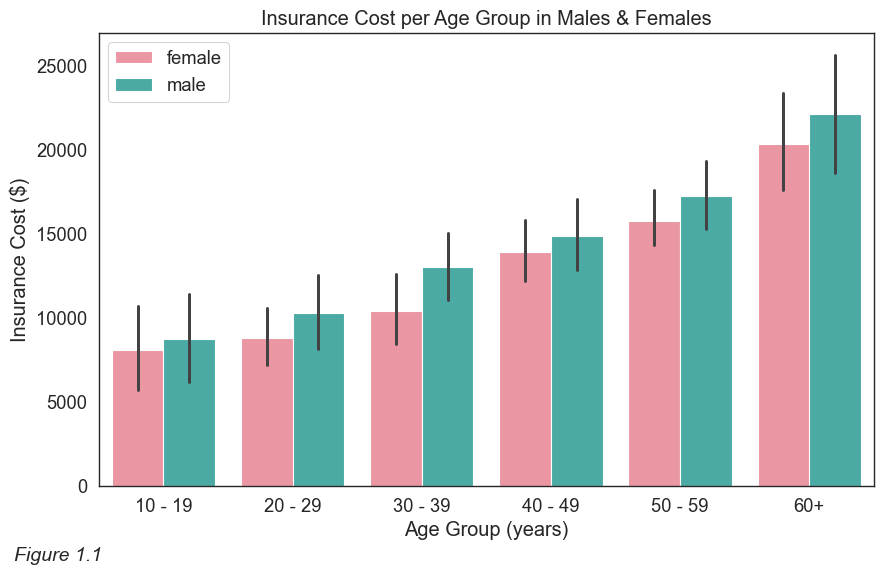

In [121]:
age_group_labels = ['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']
age_ranges = [range(10, 20), range(20, 30), range(30, 40), range(40, 50), range(50, 60), range(60, 100)]
age_group_list = []
for age in age_list:
    for age_range in age_ranges:
        if age in age_range:
            if age_range[0] != 60:
                age_group_list.append(f'{age_range[0]} - {age_range[-1]}')
            else:
                age_group_list.append(f'{age_range[0]}+')

plt.figure(figsize = (10, 6), dpi = 100)
text = "Figure 1.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

age_group_labels = ['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']
sns.barplot(x = age_group_list,  y = price_list, hue = sex_list, order = age_group_labels)

plt.title('Insurance Cost per Age Group in Males & Females')
plt.xlabel('Age Group (years)')
plt.ylabel('Insurance Cost ($)')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)


We are now looking at 5 graphs. The relationship between Age and Insurance, with a hue parameters: Sex, BMI, Children, Smoker, Region. 

- Figure 1.2 - Hue parameter - Sex. No correlation.
<br>
- Figure 1.3 - Hue parameter - BMI. No correlation.
<br>

- Figure 1.4 - Hue parameter - Children. No correlation.
<br>
- Figure 1.5 - Hue parameter - Smoker.: There is a strong correlation between Age, Smoker and Insurance Price. The lower price bracket appears to be for a non smoker insuree with linear correlation of price increase with age. The middle price bracket contains both Smokers and Non-Smokers with the same correlation. It appears to be dictated by some forth parameter. And the third higher priced bracket contains only Smokers with a very similar linear correlation of Age to Insurance Price to all the other lines.
<br>
- Figure 1.6 - Hue parameter - Region. No correlation.

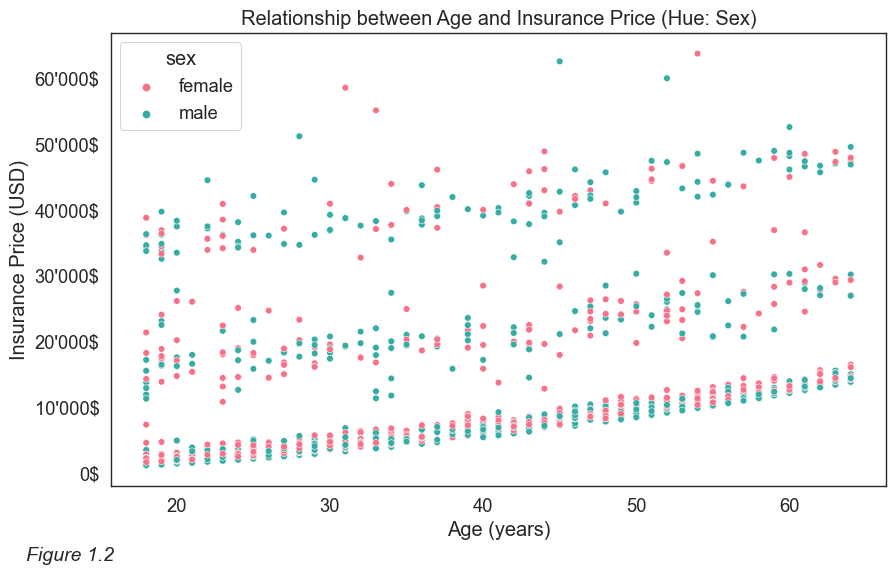

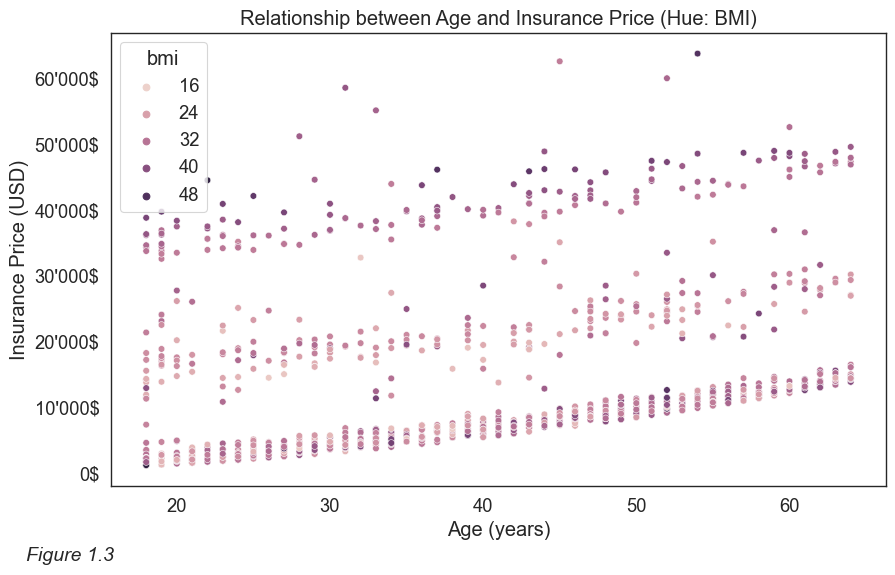

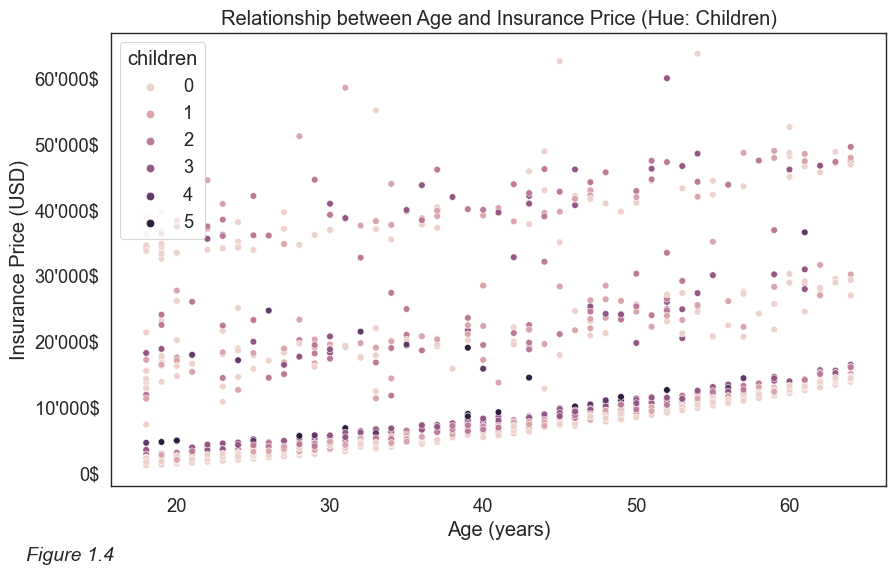

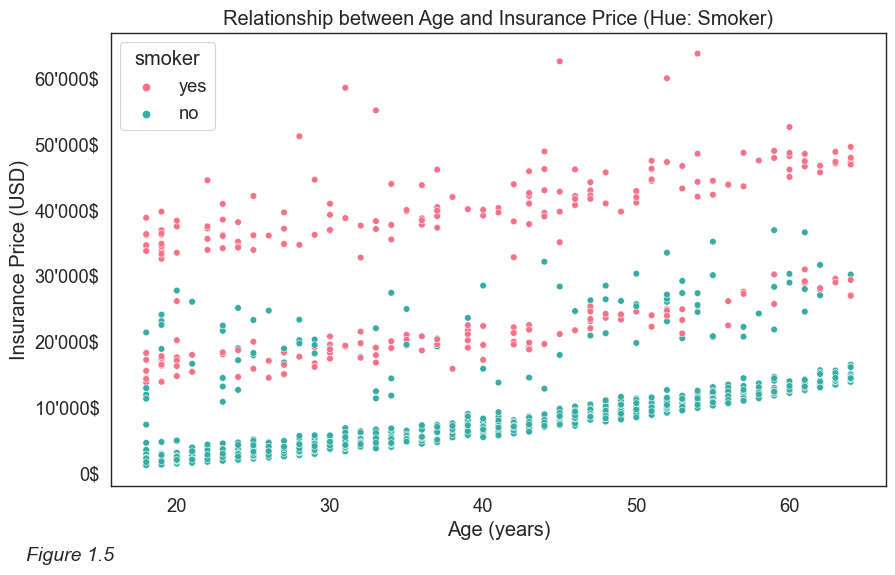

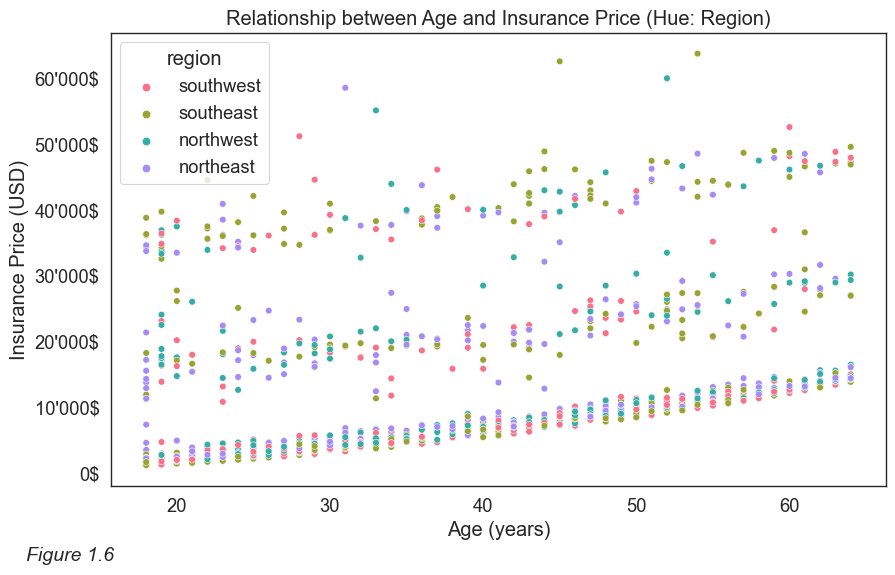

In [122]:
fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 1.2"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

ax = sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'sex')
ax.set(ylabel='Insurance Price (USD)', xlabel='Age (years)')
ax.set_yticks([0,10000,20000,30000,40000,50000,60000])
ax.set_yticklabels(['0$','10\'000$','20\'000$','30\'000$','40\'000$','50\'000$','60\'000$'])
plt.title('Relationship between Age and Insurance Price (Hue: Sex)')
plt.show()

fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 1.3"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

ax = sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'bmi')
ax.set(ylabel='Insurance Price (USD)', xlabel='Age (years)')
ax.set_yticks([0,10000,20000,30000,40000,50000,60000])
ax.set_yticklabels(['0$','10\'000$','20\'000$','30\'000$','40\'000$','50\'000$','60\'000$'])
plt.title('Relationship between Age and Insurance Price (Hue: BMI)')
plt.show()

fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 1.4"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')
 
ax = sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'children')
ax.set(ylabel='Insurance Price (USD)', xlabel='Age (years)')
ax.set_yticks([0,10000,20000,30000,40000,50000,60000])
ax.set_yticklabels(['0$','10\'000$','20\'000$','30\'000$','40\'000$','50\'000$','60\'000$'])
plt.title('Relationship between Age and Insurance Price (Hue: Children)')
plt.show()

fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 1.5"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

ax = sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'smoker')
ax.set(ylabel='Insurance Price (USD)', xlabel='Age (years)')
ax.set_yticks([0,10000,20000,30000,40000,50000,60000])
ax.set_yticklabels(['0$','10\'000$','20\'000$','30\'000$','40\'000$','50\'000$','60\'000$'])
plt.title('Relationship between Age and Insurance Price (Hue: Smoker)')
plt.show()

fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 1.6"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

ax = sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'region')
ax.set(ylabel='Insurance Price (USD)', xlabel='Age (years)')
ax.set_yticks([0,10000,20000,30000,40000,50000,60000])
ax.set_yticklabels(['0$','10\'000$','20\'000$','30\'000$','40\'000$','50\'000$','60\'000$'])
plt.title('Relationship between Age and Insurance Price (Hue: Region)')
plt.show()

#### 3.3.2 Sex vs Insurance Price

The mean of insurance prices based on gender is the same between male and female applicants, however male insurees have the bigger spread and is more dependent on insurance variables.

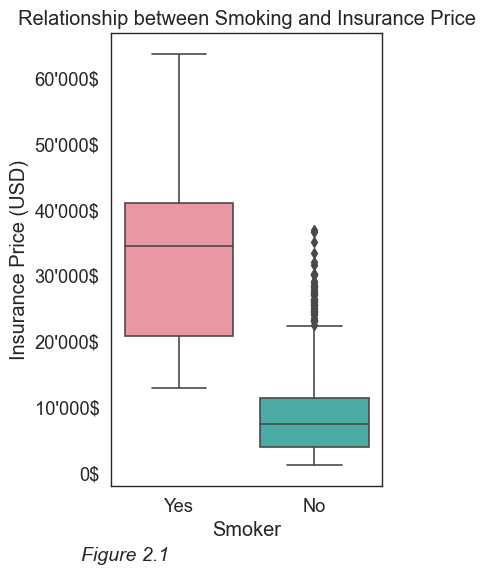

In [123]:
fig = plt.figure(figsize=(3.5,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 2.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.set_palette("Set3",1)
ax = sns.boxplot(data = df, x = 'smoker', y = 'charges')
ax.set(ylabel='Insurance Price (USD)', xlabel='Smoker')
ax.set_yticks([0,10000,20000,30000,40000,50000,60000])
ax.set_yticklabels(['0$','10\'000$','20\'000$','30\'000$','40\'000$','50\'000$','60\'000$'])
ax.set_xticklabels(['Yes','No'])
plt.title('Relationship between Smoking and Insurance Price')

plt.show()

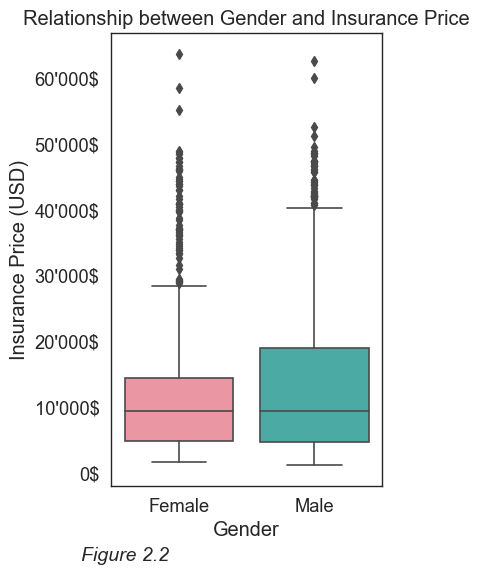

In [124]:
fig = plt.figure(figsize=(3.5,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 2.2"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')


sns.set_palette("Set3",1)
ax = sns.boxplot(data = df, x = 'sex', y = 'charges')
ax.set(ylabel='Insurance Price (USD)', xlabel='Gender')
ax.set_yticks([0,10000,20000,30000,40000,50000,60000])
ax.set_yticklabels(['0$','10\'000$','20\'000$','30\'000$','40\'000$','50\'000$','60\'000$'])
ax.set_xticklabels(['Female','Male'])
plt.title('Relationship between Gender and Insurance Price')

plt.show()

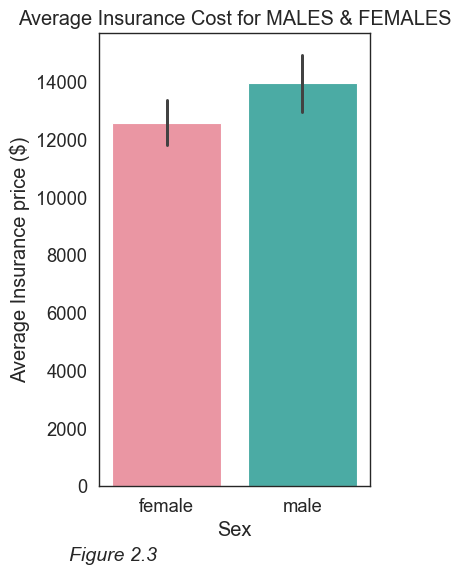

In [125]:
plt.figure(figsize = (3.5, 6),dpi = 100)
text = "Figure 2.3"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.barplot(x = sex_list, y = price_list)
plt.title('Average Insurance Cost for MALES & FEMALES')
plt.xlabel('Sex')
plt.ylabel('Average Insurance price ($)')

sns.set_style('whitegrid')
sns.set_context('paper', font_scale = 1.5)

plt.show()

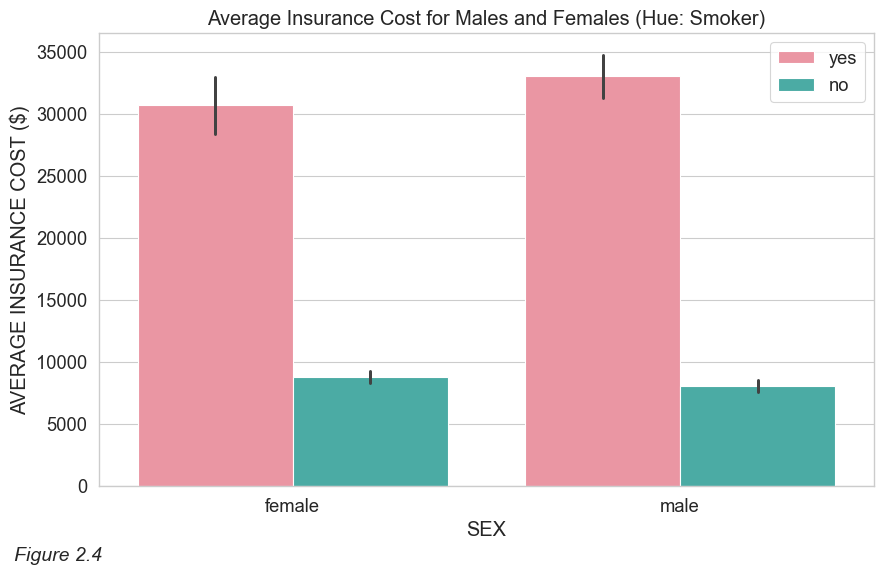

In [126]:
plt.figure(figsize = (10, 6),dpi = 100)
text = "Figure 2.4"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.barplot(x = sex_list, y = price_list, hue = smoker_list)
plt.title('Average Insurance Cost for Males and Females (Hue: Smoker)')
plt.xlabel('SEX')
plt.ylabel('AVERAGE INSURANCE COST ($)')

sns.set_style('whitegrid')
sns.set_context('paper', font_scale = 1.5)

plt.show()

#### 3.3.3 BMI vs Insurance Price

Looking at the BMI/Insurance Price graph we can see two correlations. One where there is a strong correlation between the two, and the other one where the BMI index doesn't play a massive role in the price increase. We would need to investigate that further in order to understand why there is a bi-split. To do that, we will be using the 'hue' option to understand which of the parameters dictate this split. The suspicion will fall onto binomial parameters such as 'If the person is smoking?', or 'What is the Gender?'. 

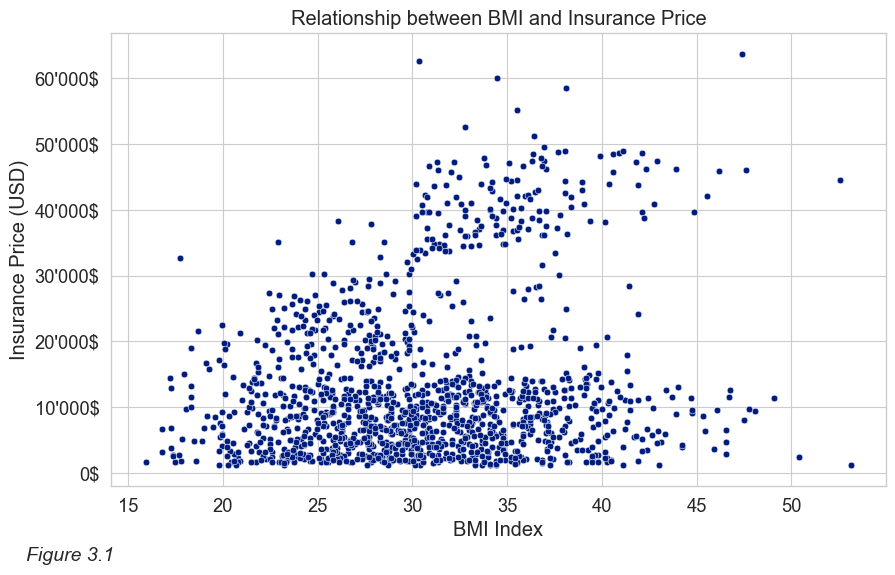

In [127]:
fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 3.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.set_palette("dark")
ax = sns.scatterplot(data = df, x = 'bmi', y = 'charges')
ax.set(ylabel='Insurance Price (USD)', xlabel='BMI Index')
ax.set_yticks([0,10000,20000,30000,40000,50000,60000])
ax.set_yticklabels(['0$','10\'000$','20\'000$','30\'000$','40\'000$','50\'000$','60\'000$'])
plt.title('Relationship between BMI and Insurance Price')

plt.show()

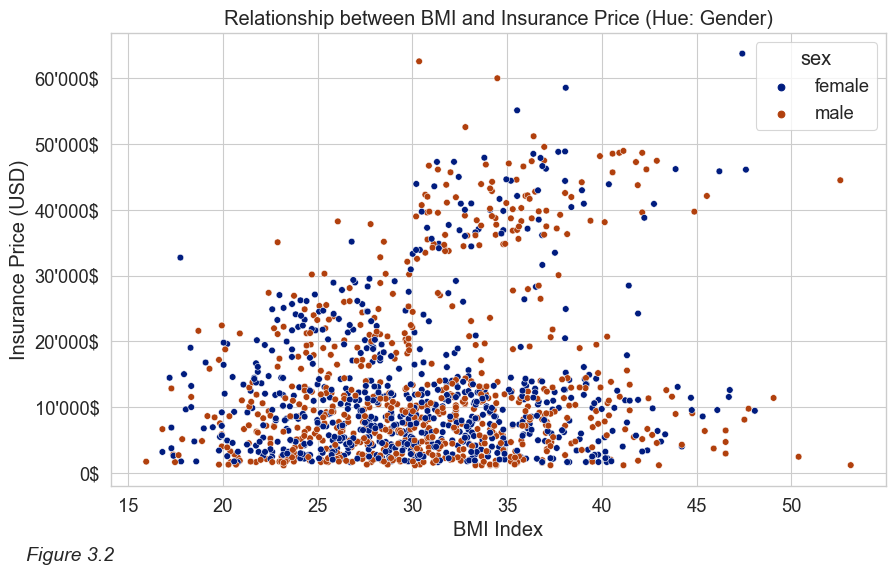

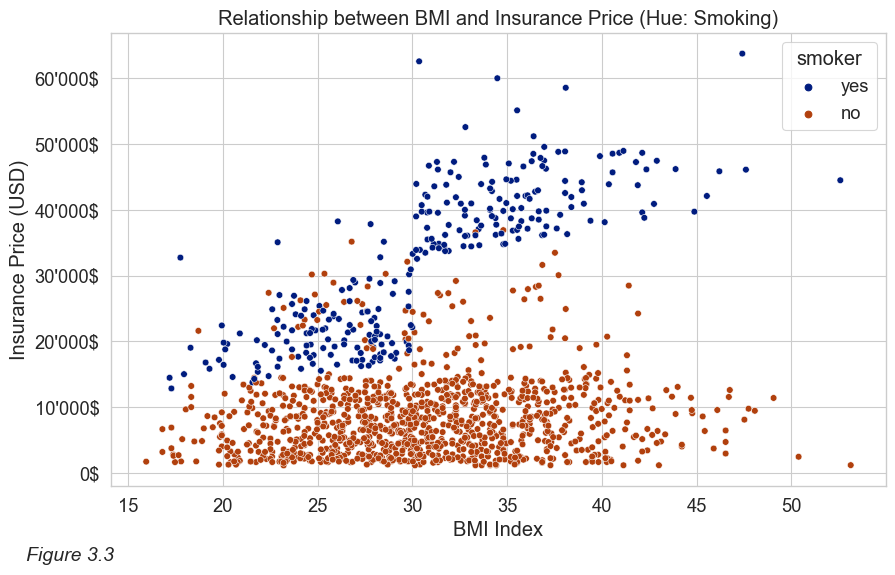

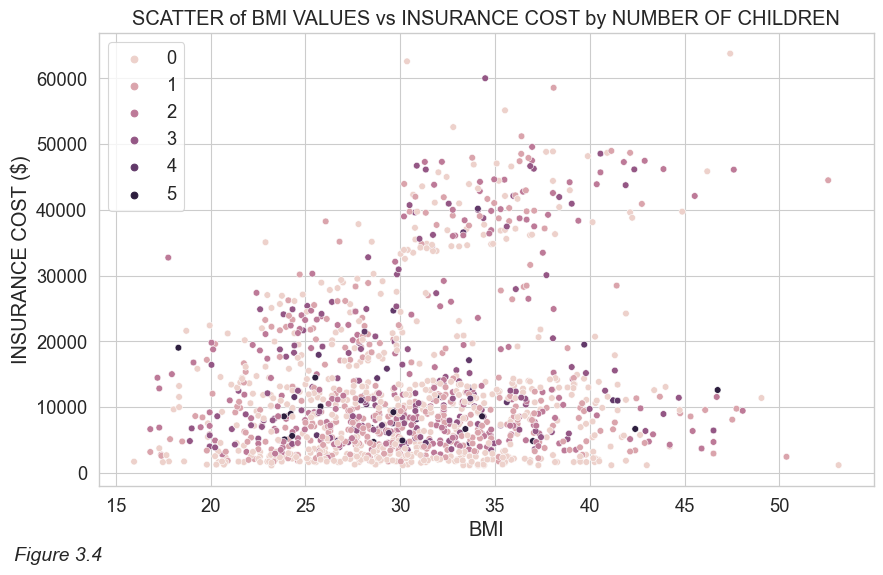

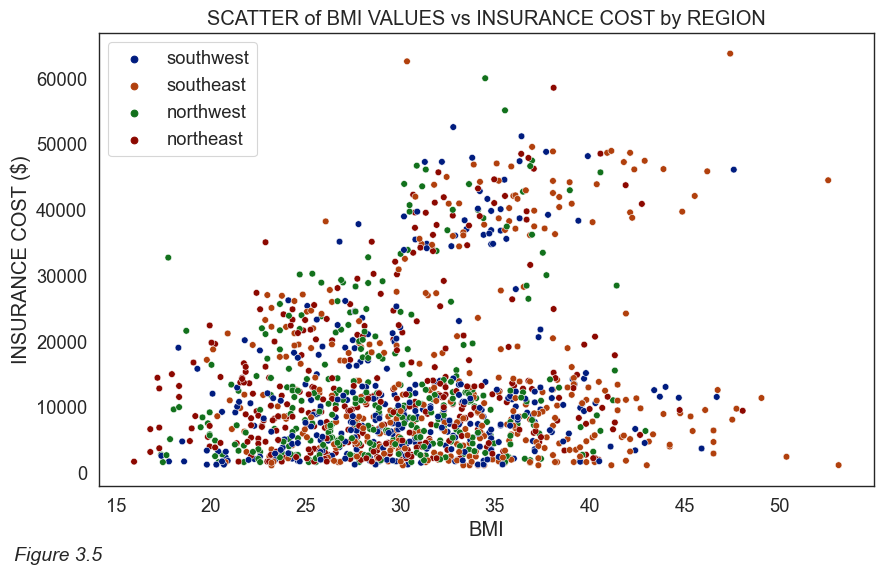

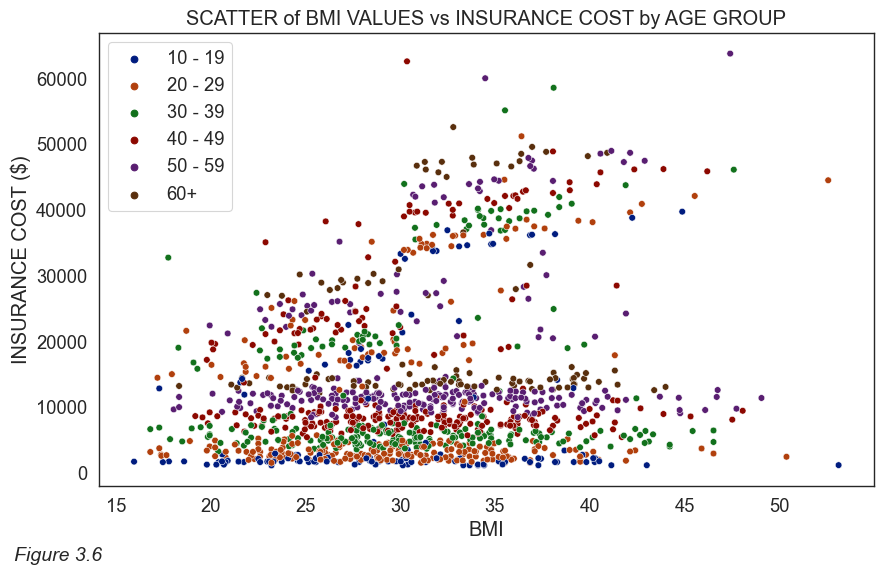

In [128]:
#HUE graphs

#Hue:Sex
fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 3.2"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.set_palette("dark")
ax = sns.scatterplot(data = df, x = 'bmi', y = 'charges', hue = 'sex')
ax.set(ylabel='Insurance Price (USD)', xlabel='BMI Index')
ax.set_yticks([0,10000,20000,30000,40000,50000,60000])
ax.set_yticklabels(['0$','10\'000$','20\'000$','30\'000$','40\'000$','50\'000$','60\'000$'])
plt.title('Relationship between BMI and Insurance Price (Hue: Gender)')

plt.show()

#Hue:Smoker
fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 3.3"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.set_palette("dark")
ax = sns.scatterplot(data = df, x = 'bmi', y = 'charges', hue = 'smoker')
ax.set(ylabel='Insurance Price (USD)', xlabel='BMI Index')
ax.set_yticks([0,10000,20000,30000,40000,50000,60000])
ax.set_yticklabels(['0$','10\'000$','20\'000$','30\'000$','40\'000$','50\'000$','60\'000$'])
plt.title('Relationship between BMI and Insurance Price (Hue: Smoking)')

plt.show()

#Hue:Children
plt.figure(figsize = (10, 6),dpi = 100)
text = "Figure 3.4"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.scatterplot(x = bmi_list, y = price_list, hue = children_list)
plt.title('SCATTER of BMI VALUES vs INSURANCE COST by NUMBER OF CHILDREN')
plt.xlabel('BMI')
plt.ylabel('INSURANCE COST ($)')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)

plt.show()

#Hue:Region
plt.figure(figsize = (10, 6),dpi = 100)
text = "Figure 3.5"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.scatterplot(x = bmi_list, y = price_list, hue = region_list)
plt.title('SCATTER of BMI VALUES vs INSURANCE COST by REGION')
plt.xlabel('BMI')
plt.ylabel('INSURANCE COST ($)')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)

plt.show()

#Hue:Age
plt.figure(figsize = (10, 6),dpi = 100)
text = "Figure 3.6 "
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.scatterplot(x = bmi_list, y = price_list, hue = age_group_list, hue_order = age_group_labels)
plt.title('SCATTER of BMI VALUES vs INSURANCE COST by AGE GROUP')
plt.xlabel('BMI')
plt.ylabel('INSURANCE COST ($)')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)

plt.show()

Focusing on two binomial columns we have in the dataset, we can straight away say that Gender has no correlation on relationship between BMI and Insurance Price, but whether a person is a smoker does. In fact the inusrance companies do not penalise the insuree on their BMI, unless they smoke. 

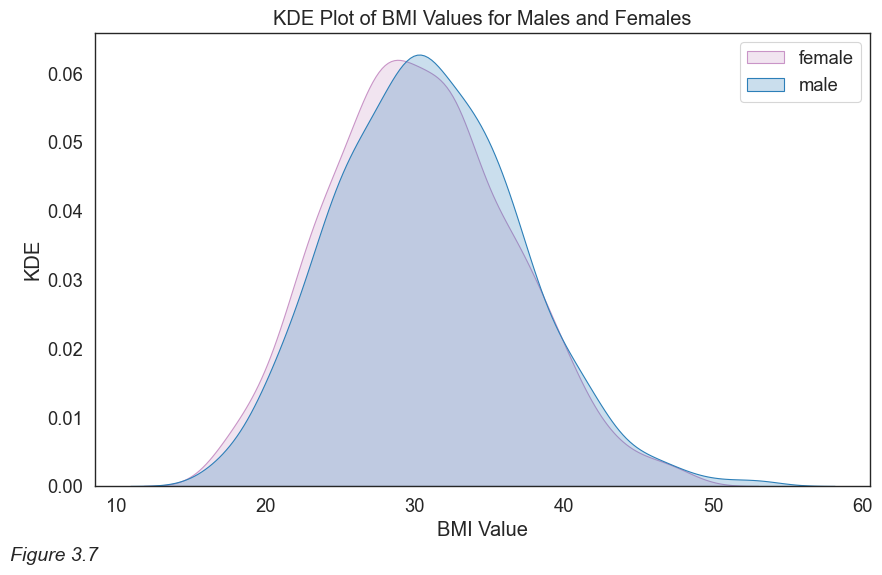

In [129]:
females_bmi = []
males_bmi = []
for i in range(len(price_list)):
    if sex_list[i] == 'male':
        males_bmi.append(bmi_list[i])
    else:
        females_bmi.append(bmi_list[i])

plt.figure(figsize = (10, 6),dpi = 100)
text = "Figure 3.7"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.kdeplot(females_bmi, shade = True, color = "#c994c7")
sns.kdeplot(males_bmi, shade = True, color = "#2c7fb8")
plt.title('KDE Plot of BMI Values for Males and Females')
plt.xlabel('BMI Value')
plt.ylabel('KDE')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)
plt.legend(['female', 'male'])

plt.show()


#### 3.3.4 Number of Children vs Insurance Price

Number of children marginaly affect the price of the medical insurance. The mean insurance price stays very close, but the spread of the data varies. Having 2 children has the biggest spread of insurance prices, and 5 children gives the least. 

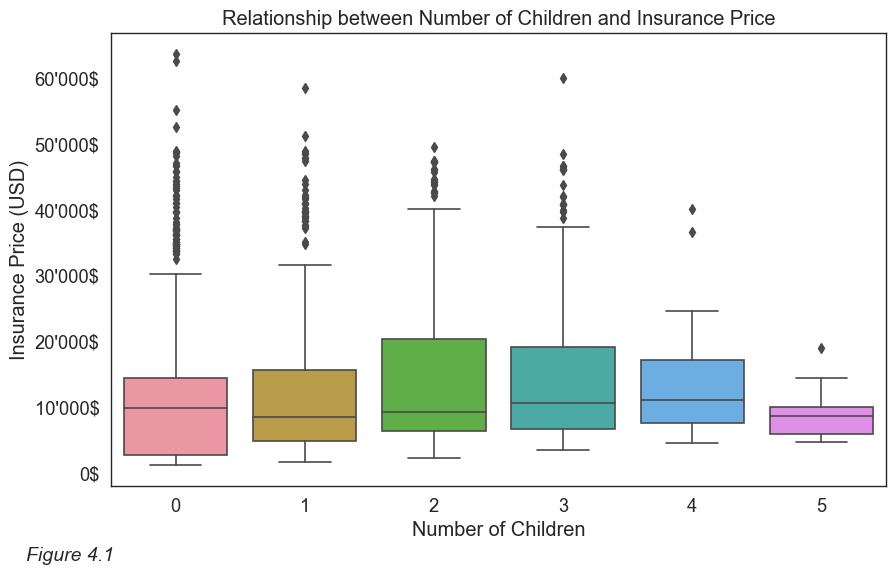

In [149]:
fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 4.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')


sns.set_palette("Set3",1)
ax = sns.boxplot(data = df, x = 'children', y = 'charges')
ax.set(ylabel='Insurance Price (USD)', xlabel='Number of Children')
ax.set_yticks([0,10000,20000,30000,40000,50000,60000])
ax.set_yticklabels(['0$','10\'000$','20\'000$','30\'000$','40\'000$','50\'000$','60\'000$'])
plt.title('Relationship between Number of Children and Insurance Price')

plt.show()

#### 3.3.5 Smoking vs Insurance Price

On the graph above we can see a very large difference in the mean insurance prices between smokers and non smokers. With most non smokers, inside the IQR being between 5'000$ and 10'000$. While the smokers IQR being both wider and higher, covering insurance prices between 20'000$ and 40'000$. There is a very strong affect smoking has on the insurance price.


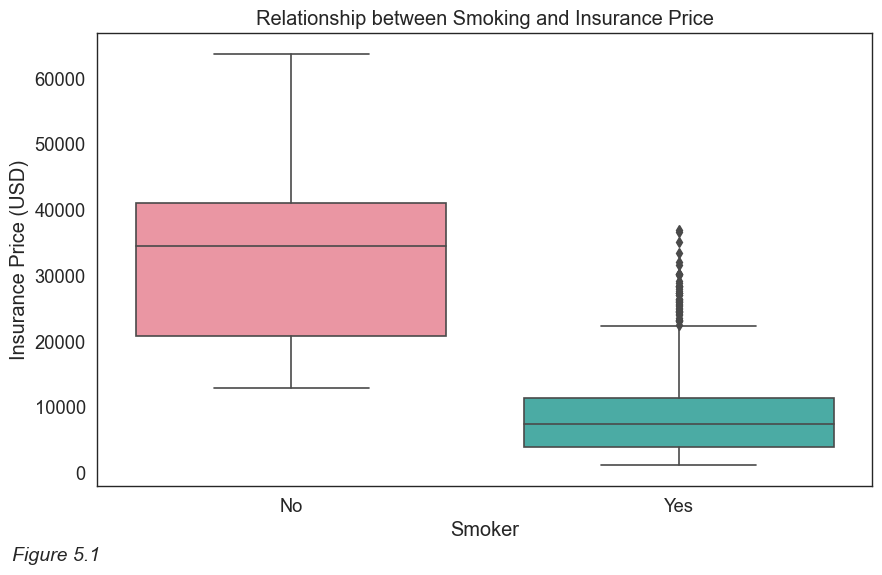

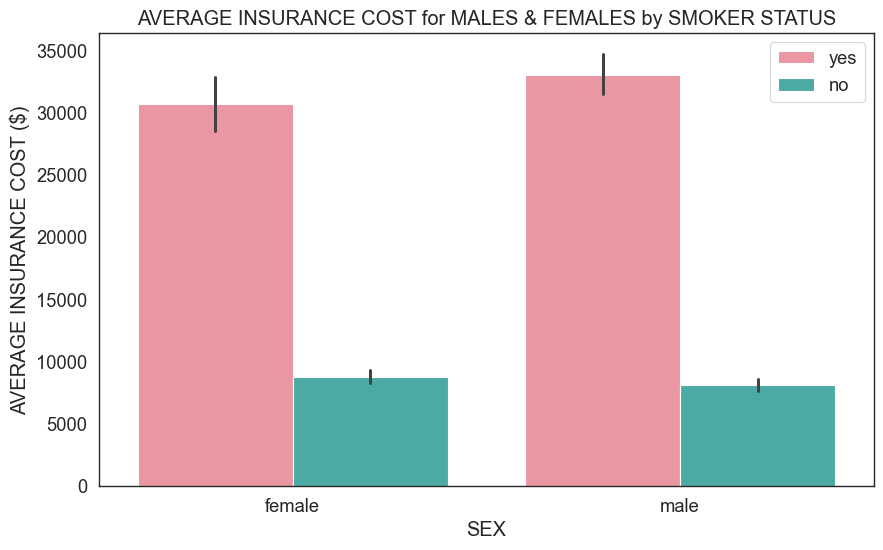

In [132]:
fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 5.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')


ax = sns.boxplot(data = df, x = 'smoker', y = 'charges')
ax.set(ylabel='Insurance Price (USD)', xlabel='Smoker')
plt.title('Relationship between Smoking and Insurance Price')
ax.set_xticklabels(['No','Yes'])

plt.show()


plt.figure(figsize = (10, 6),dpi = 100)

sns.barplot(x = sex_list, y = price_list, hue = smoker_list)
plt.title('AVERAGE INSURANCE COST for MALES & FEMALES by SMOKER STATUS')
plt.xlabel('SEX')
plt.ylabel('AVERAGE INSURANCE COST ($)')

sns.set_style('whitegrid')
sns.set_context('paper', font_scale = 1.5)

plt.show()

#### 3.3.6 Region vs Insurance Price

All four regions average out at the same insurance price, at around 9'000$. All four also share the Q1, but have various Q3 indicating further spread of the data in different regions. South-East region has the highest Q3 of the four. It could be due to the number of things. For example, it could see the most age-diverse community in that area, while the others could be limited to a certain age group. 

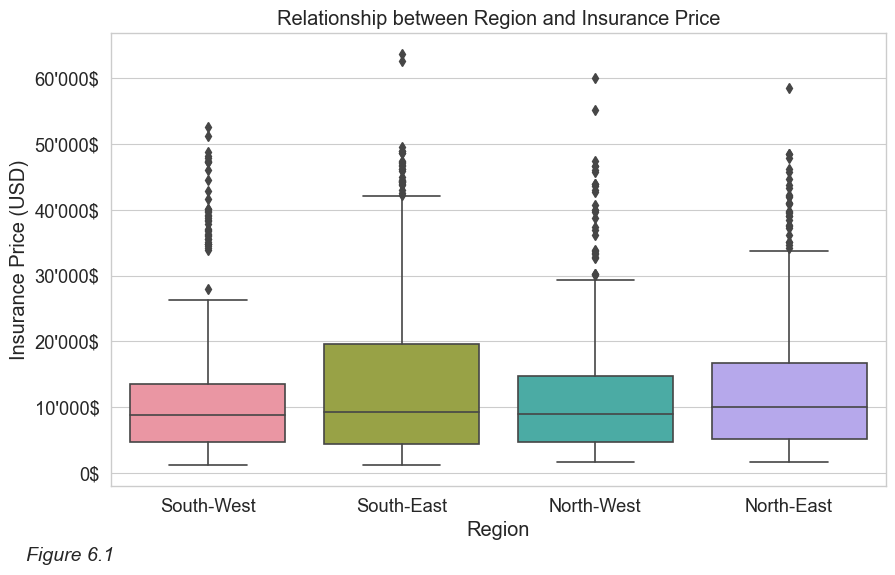

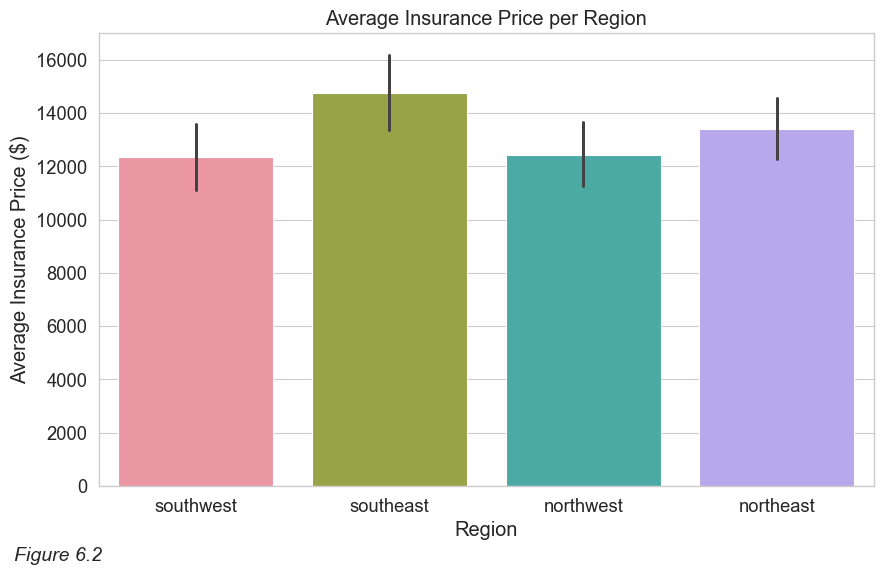

In [133]:
fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 6.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')


sns.set_palette("Set3",1)
ax = sns.boxplot(data = df, x = 'region', y = 'charges')
ax.set(ylabel='Insurance Price (USD)', xlabel='Region')
ax.set_yticks([0,10000,20000,30000,40000,50000,60000])
ax.set_yticklabels(['0$','10\'000$','20\'000$','30\'000$','40\'000$','50\'000$','60\'000$'])
ax.set_xticklabels(['South-West','South-East', 'North-West', 'North-East'])
plt.title('Relationship between Region and Insurance Price')

plt.show()

plt.figure(figsize = (10, 6), dpi = 100)
text = "Figure 6.2"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.barplot(x = region_list, y = price_list)
plt.title('Average Insurance Price per Region')
plt.xlabel('Region')
plt.ylabel('Average Insurance Price ($)')

sns.set_style('whitegrid')
sns.set_context('paper', font_scale = 1.5)

plt.show()

#### 3.3.7 Heat map

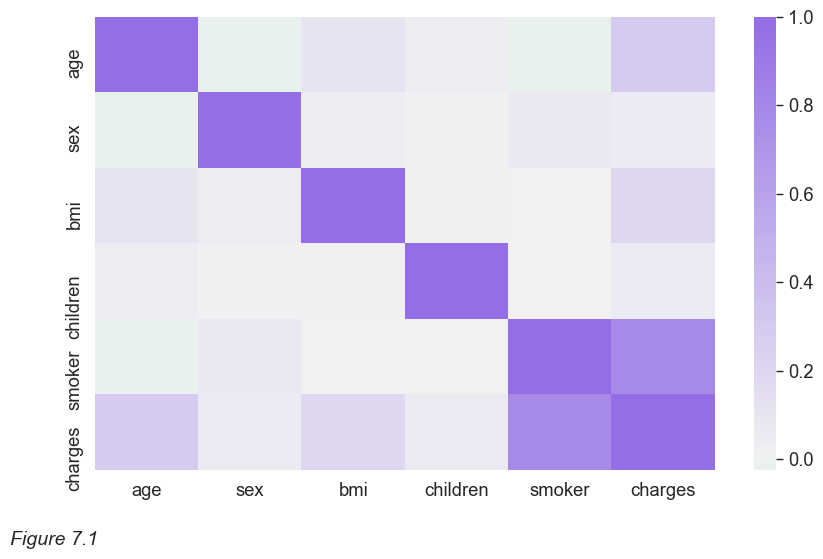

In [134]:

# converting Gender and Smoker to binomial
df_binomial = df

sex = {'male': 1,'female': 0}
smoker = {'yes': 1, 'no': 0}
df_binomial.sex = [sex[item] for item in df.sex]
df_binomial.smoker = [smoker[item] for item in df.smoker]



plt.figure(figsize = (10,6),dpi = 100)
text = "Figure 7.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

colors = sns.diverging_palette(150, 275, s = 80, l = 55, n = 9, as_cmap = True)
sns.heatmap(df_binomial.corr(), center = 0, cmap = colors, robust = True)

plt.show()

## 4 Hypothesis Testing:

We will conduct a two sample t-test with a sample of males and females from the data frame. The basics of the test assumes:

1. samples are approximately normally distributed
2. standard deviations of the samples are equal
3. samples are independent

In order to achieve this, we will split the insurance prices into two seperate lists of males and females, and also create KDE plots to understand if they are normaly distributed.

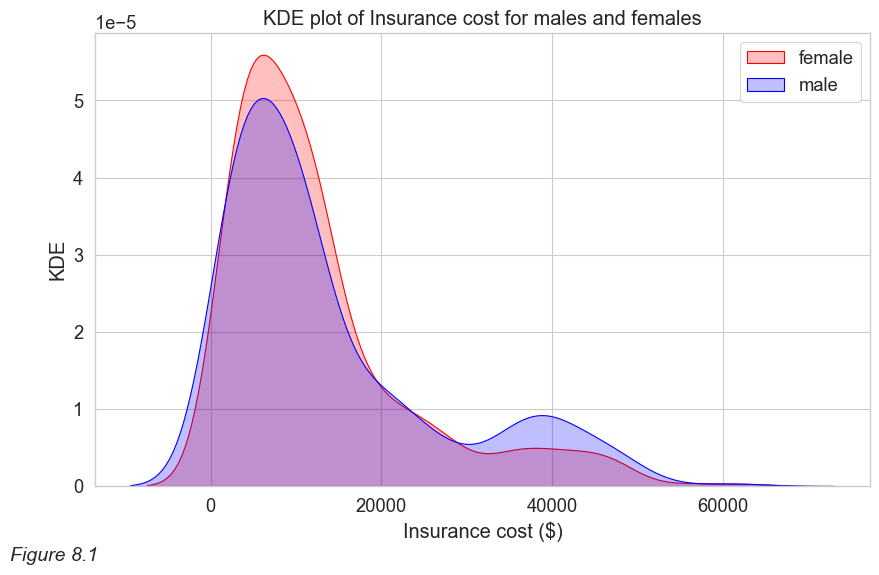

In [135]:
male_prices = []
female_prices = []

for i in range(len(df)):
    if sex_list[i] == "male":
        male_prices.append(price_list[i])
    else:
        female_prices.append(price_list[i])

plt.figure(figsize = (10, 6),dpi = 100)
text = "Figure 8.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.kdeplot(female_prices, shade = True, color = 'red')
sns.kdeplot(male_prices, shade = True, color = 'blue')
plt.title('KDE plot of Insurance cost for males and females')
plt.xlabel('Insurance cost ($)')
plt.ylabel('KDE')
sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)
plt.legend(['female', 'male'])
plt.show()

In order to do the t-test, we need to have the normally distributed datasets. The datasets above are bimodal. That is due to the smoking factor. 

In [136]:
female_std = round(np.std(female_prices), 2)
male_std = round(np.std(male_prices), 2)
print('Standard deviation of the female sample: ', female_std)
print('Standard deviation of the male sample: ', male_std)

Standard deviation of the female sample:  11120.3
Standard deviation of the male sample:  12961.43


Due to the standard deviations of two samples being different, we can conclude that they are independant. 

- The NULL hypothesis: "There is no difference between insurance costs of males and females"
- Alternative hypothesis: "Males are charged significantly more for insurance than females"
- Significance threshold = 0.05

In [137]:
#The 2 sample t-test:

pval = ttest_ind(female_prices, male_prices, equal_var = False)[1]

print('All males and all females twosample t-test p-value: ', pval)

#equal_var false, is used when standard deviations are not the same. 
#Running the test this way has disadvantages. It nmakes it harder to reject the null hypothesis
#even when there is a true difference between groups.


#0.035841014956016645
#The null hypothesis is False

All males and all females twosample t-test p-value:  0.035841014956016645


This implies that the null hypothesis can be rejected.

We now would split the samples further by smokers and non smokers.

In [138]:
male_prices_smoker = []
female_prices_smoker = []
male_prices_nonsmoker = []
female_prices_nonsmoker = []

for i in range(len(sex_list)):
    if sex_list[i] == 'male' and smoker_list[i] == 'yes':
        male_prices_smoker.append(price_list[i])
    elif sex_list[i] == 'male' and smoker_list[i] == 'no':
        male_prices_nonsmoker.append(price_list[i])
    if sex_list[i] == 'female' and smoker_list[i] == 'yes':
        female_prices_smoker.append(price_list[i])
    elif sex_list[i] == 'female' and smoker_list[i] == 'no':
        female_prices_nonsmoker.append(price_list[i])

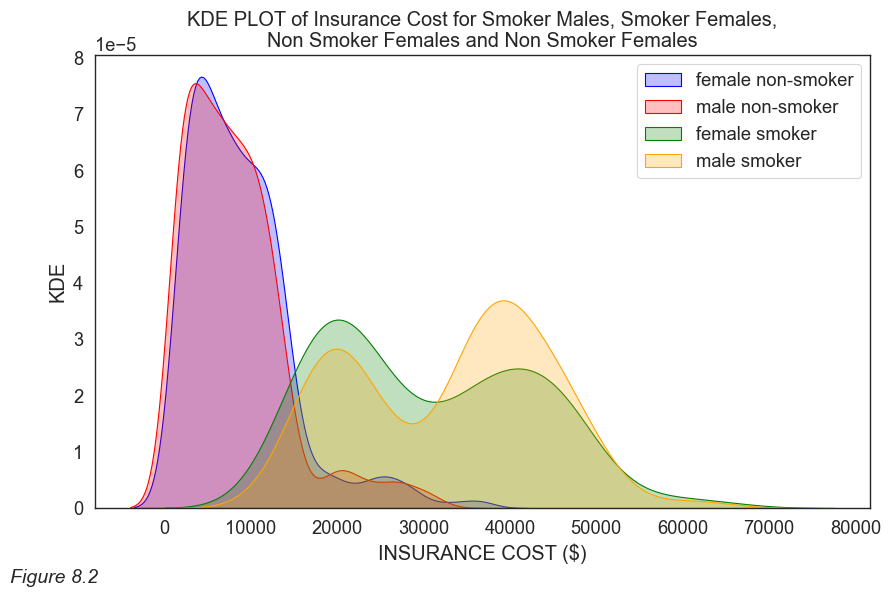

In [139]:
plt.figure(figsize = (10, 6),dpi = 100)
text = "Figure 8.2"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

sns.kdeplot(female_prices_nonsmoker, shade = True, color = 'blue')
sns.kdeplot(male_prices_nonsmoker, shade = True, color = 'red')
sns.kdeplot(female_prices_smoker, shade = True, color = 'green')
sns.kdeplot(male_prices_smoker, shade = True, color = 'orange')


plt.title('KDE PLOT of Insurance Cost for Smoker Males, Smoker Females,\nNon Smoker Females and Non Smoker Females')
plt.xlabel('INSURANCE COST ($)')
plt.ylabel('KDE')

sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)
plt.legend(['female non-smoker', 'male non-smoker', 'female smoker', 'male smoker'])

plt.show()


In [140]:
female_nonsmoker_average = round(np.mean(female_prices_nonsmoker), 2)
male_nonsmoker_average = round(np.mean(male_prices_nonsmoker), 2)

print('Average insurance cost for non-smoker females: ', female_nonsmoker_average)
print('Average insurance cost for non-smoker males: ', male_nonsmoker_average)


print('Average insurance cost for smoker females: ', round(np.mean(female_prices_smoker), 2))
print('Average insurance cost for smoker males: ', round(np.mean(male_prices_smoker), 2))


Average insurance cost for non-smoker females:  8762.3
Average insurance cost for non-smoker males:  8087.2
Average insurance cost for smoker females:  30679.0
Average insurance cost for smoker males:  33042.01


We will hearby focus just on the non smoker males and females. The distributions are both normal.

In [141]:
female_nonsmoker_std = round(np.std(female_prices_nonsmoker), 2)
male_nonsmoker_std = round(np.std(male_prices_nonsmoker), 2)
print('Standard deviation for non-smoker females sample: ', female_nonsmoker_std)
print('Standard deviation for non-smoker males sample: ', male_nonsmoker_std)

Standard deviation for non-smoker females sample:  6055.23
Standard deviation for non-smoker males sample:  5902.39


The standard deviations of these distributions are approximately equal. The samples can be assumed to be independent.

- The NULL hypothesis: "There is no difference between insurance costs of non-smoker males and non-smoker females"
- ALTERNATIVE hypothesis: "Non-smoker males are charged significantly more for insurance than non-smoker females"
- Significance threshold = 0.05

In [142]:
#The 2 sample t-test:

female_nonsmoker_average = round(np.mean(female_prices_nonsmoker), 2)
male_nonsmoker_average = round(np.mean(male_prices_nonsmoker), 2)

print('Average insurance cost for non-smoker females: ', female_nonsmoker_average)
print('Average insurance cost for non-smoker males: ', male_nonsmoker_average)

pval = ttest_ind(female_prices_nonsmoker, male_prices_nonsmoker)[1]

print('Non-smoker females and non-smoker males two sample t-test p-value: ', pval)

#0.06610296328675346
#The null hypothesis is False

Average insurance cost for non-smoker females:  8762.3
Average insurance cost for non-smoker males:  8087.2
Non-smoker females and non-smoker males two sample t-test p-value:  0.0662975827670908


In [143]:
print('Average insurance cost for smoker females: ', round(np.mean(female_prices_smoker), 2))
print('Average insurance cost for smoker males: ', round(np.mean(male_prices_smoker), 2))

Average insurance cost for smoker females:  30679.0
Average insurance cost for smoker males:  33042.01


## 5 MACHINE LEARNING - MULTIPLE LINEAR REGRESSION

In [144]:
#splitting into training and testing set:
x1 = df_binomial[['age', 'bmi', 'children']]
y1 = df_binomial[['charges']]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.8, test_size = 0.2, random_state = 6)

mlr1 = LinearRegression()
mlr1.fit(x1_train, y1_train)

y1_predicted = mlr1.predict(x1_test)

#assessing the accuracy of the model with residual analysis:
r_squared1 = mlr1.score(x1_test, y1_test)
print(r_squared1)

#age, bmi and children yield an R**2 value of 0.06486747163642559
#this means these variables hardly account for the variation seen in the data (looking for R**2 values of 0.7 and higher)


#----------------------


#splitting into training and testing set:
x2 = df_binomial[['age', 'sex', 'bmi', 'children', 'smoker']]
y2 = df_binomial[['charges']]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.8, test_size = 0.2, random_state = 6)

mlr2 = LinearRegression()
mlr2.fit(x2_train, y2_train)

y2_predicted = mlr2.predict(x2_test)

r_squared2 = mlr2.score(x2_test, y2_test)
print(r_squared2)


#with sex and smoker columns added, the R**2 value is now 0.778883116737676
#these variables together account for 78% variation in y_predicted from y_actual
#the most impactful variable is smoker status
#removing just the smoker column, the R**2 value drops to 0.06736123573269259
#regions variable was not included in the analysis

#including regions variable in the analysis:
#df = pd.get_dummies(data = df, columns = ['region'])
#print(df.head())

#splitting into training and testing set:
#x3 = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
#y3 = df[['charges']]

#x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size = 0.8, test_size = 0.2, random_state = 6)

#mlr3 = LinearRegression()
#mlr3.fit(x3_train, y3_train)

#y3_predicted = mlr3.predict(x3_test)

#assessing the accuracy of the model2:
#residual analysis:
#r_squared3 = mlr3.score(x3_test, y3_test)
#print(r_squared3)
# R**2 is now 0.7772568430294239 (actually went down slightly)

0.0648674716364257
0.778883116737676


## 6 Results

#### Results

Looking through the results, I have first inspected the data frame for any missing/abnormal/incorrect filled data (Ch. 3.1). It showed no abnormalities, and overall gave an impression of very clean dataset. 

The average insurance price is 13270.42 $ (Ch 3.2.7)

#### Age

Looking at the age, it shows a very balanced average age of 39.21. Standard deviation of 14.04 and the range of 46 years apart. (Ch 3.2.1)

Figure 1.1, looking at the relationship between insurance price and the age in the 10 year segment age groups, split with gender. We can see on the bar plot that there is a steady increase of insurance price with age, as well as the mean insurance price for male being higher for male over female insurers in all age segments. We will return to examining this later. 

In order to inspect the relationship further I have drown 5 scatter graphs of Age vs Insurance price and Hue: Sex, BMI, Children, Smoker, Region. All of the graphs show a clear three lines of positive trend. 

Figures 1-2 Hue: Sex; 1-3 Hue: BMI; 1-4 Hue: Children; 1-6 Hue: Region shows little or no correlation to explain the origin of the scatter graphs shape. 

Figure 1-5 Hue: Smoker on the other hand shows a distinctive correlation. The lower band is entirely non smokers. The upper band with the higher prices is smokers. The middle line is the mix between the two. 

A non-smoking individual in the age group ’60+’ can expect an average insurance charge of as much as 4 times greater than an individual in the ’10-19’ age group. This can grow to be as much as 9 times greater for smokers in the ’60+’ age group compared to non-smokers in the ’10-19’ age group, indicating once again, that smoking significantly increases the cost of insurance.

#### Gender

The gender split in the dataset is pretty equal. The data frame has 676 males and 662 females. (Ch 3.2.2) which is 51% / 49% split. 

The average price of the insurance for the males is 13956.75 $, and 12569.58 $ for the females. Difference is 1387.17 $

Digging deeper and looking at smokers and non smokers, the average price of the smoker male is 33042.01 $, while for a smoker female it is 30679.0 $ with a difference of 2363.01 $. Having male insurance price still being higher.

The non smoker average price for males is 8087.2 $ and 8762.3 $ for the females. Making a difference of -675.09 $, Making the average female non smoker insurance price actually pricier then for males. (Ch 3.2.7)

There are 274 smokers and 1064 non smokers in the dataset. (Ch 3.2.4)

Whether a male individual pays more for insurance than a female individual is significantly affected by whether the male is a smoker, which can be observed on Figure 8.2

Figure 8.2 shows that both smoker distributions are bimodal, which indicates that there is another factor that significantly affects the final insurance cost in the smoker sample other than gender.

In non-smokers, males are observed to pay on average 675.10 USD *less* than females, however upon further analysis, this was not found to be a statistically significant difference (p-value = 0.066 of two-sample t-test for a significance threshold of 0.05. (Ch 4)

#### BMI

The average BMI in the dataset is 30.66. The standard deviation of BMI values is 6.1. (Ch 3.2.3)

Looking at Figure 3.7, a KDE plot of Male and Female BMI distributions we can see that both of them are normally and evenly distributed. In fact almost identical.

Figure 3.2 is a scatter graph between the BMI and insurance price (Hue: Sex). The scatter graph shows three distinctive plots, implying that at least one another variable significantly varying the insurance price of individuals with the same BMI and gender. At the same time we see that gender is no that variable. 

Three distinctive plots are seen on all the scatter plots associated with BMI.

Looking at the further scatter graphs with Hue: Children, Region and Age. Figures 3.4, 3.5, 3.6. There are no observable effect and no segregation of insurance cost. 

However Figure 3.3 on the other hand Hue: Smoker reveals all three layers. 
	
1. The lowest insurance cost bracket contains a large proportion of non-smokers with a wide range of BMI values
2. The medium insurance cost bracket contains smokers with a BMI value less than 30, and some non-smokers with a high BMI value as well as non-smokers with low BMI value, who could potentially have other unfavourable attributes
3. The high insurance cost bracket, which contains mostly smokers with a high BMI value.

The above indicates that smokers and non-smokers are treated differently, with the single biggest factor affecting insurance cost in the smokers is BMI value. Meanwhile, it is not immediately clear what, if not a high BMI, could put a non-smoking individual into the medium insurance cost bracket.

#### Number of Children

The average number of children is closer to one, at 1.09. While out of the families who have at least one child, the average is 1.92.  The percentage of individuals without children is 43%.

It is hard to understand the relationship between number of children and insurance price, without investigating the matter further. A bar plot Figure 4.1 shows a distribution of insurance cost between number of children. 

#### Region

Distribution of induviduals per region is as follows:
- South West - 325
- South East - 364
- North West - 325
- North East - 324

All the regions are equally distributed. Figure 6.2 is a bar plot representing the insurance price per region. We can conclude from it that the highest insurance prices South East and the lowest is closely shared by South West and North West. 

However, looking closer at the data South East has considerably more smokers then any other region. 

South East - 91 smokers
South West - 58 smokers
North West - 58 smokers
North East - 67 smokers

Further investigation would be needed to understand significance of induvidual region on insurance prices.

#### Machine Learning

Multiple linear regression model was found to be a good predictor of an individual’s insurance cost based on the following attributes: age, sex, BMI, children, and smoker status with an R^2 value of 0.7789.

Removing the smoker status attribute dropped the R^2 to 0.0674 indicating that smoker is the single biggest factor accounting for over 70% variation between predicted and actual insurance costs of individuals.

### Conclusions

- The most significant factor on insurance price between induviduals in the data frame is smoking. It is far ahead of the rest of the parameters. The second place is taken by Age, and the third is by BMI.

- A person who doesnt smoke and with the age above 60 would average 4 times of what a person in the '10-19' group. 

- A person who smokes in the age above 60 would average 9 times of that if compared to a non smoker in the same '10-19' category.

- There was no statistically significant difference between insurance costs of male and female non-smokers. However, male smokers should expect to pay on average 2,363.01 USD more than female smokers.

- The number of children and an individual's region were found to have little or no affect on a persons insurance cost.  